In [40]:
import numpy as np
import pandas as pd

In [41]:
data = pd.read_stata("../data/unemp.dta")
data.head()

,year,serial,month,hwtfinl,cpsid,asecflag,hflag,asecwth,pernum,wtfinl,cpsidp,asecwt,empstat,labforce,whyptlwk,wnlook,wrkoffer,covidlook
0,2009,1,march,NaN,2.007120e+13,asec,NaN,534.34,1,NaN,2.007120e+13,534.34,at work,"yes, in the labor force",niu,NaN,NaN,NaN
1,2009,1,march,NaN,2.007120e+13,asec,NaN,534.34,2,NaN,2.007120e+13,534.34,at work,"yes, in the labor force",niu,NaN,NaN,NaN
2,2009,2,march,NaN,2.007120e+13,asec,NaN,546.24,1,NaN,2.007120e+13,546.24,at work,"yes, in the labor force",niu,NaN,NaN,NaN
3,2009,2,march,NaN,2.007120e+13,asec,NaN,546.24,2,NaN,2.007120e+13,546.24,at work,"yes, in the labor force",niu,NaN,NaN,NaN
4,2009,3,march,NaN,2.007120e+13,asec,NaN,287.76,1,NaN,2.007120e+13,287.76,at work,"yes, in the labor force",niu,NaN,NaN,NaN


In [42]:
data["month"] = data["month"].map({
    "january": 1,
    "february": 2,
    "march": 3,
    "april": 4,
    "may": 5,
    "june": 6,
    "july": 7,
    "august": 8,
    "september": 9,
    "october": 10,
    "november": 11,
    "december": 12,
})

In [43]:
data.drop(data[data["year"] < 2019].index, inplace=True)

In [44]:
data["gen_unemp"] = (
    data["empstat"].isin([
      "unemployed, experienced worker",
      "unemployed, new worker"
    ])
    | data["wnlook"].isin([
        "couldn't find any work"
    ])
).astype(int)

data["eco_pt"] = (
    data["whyptlwk"].isin([
        "could only find part-time",
        "job terminated",
        "material shortage",
        "labor dispute"
    ])
).astype(int)

data["covid_unemp"] = (
    data["covidlook"].isin([
        "yes"
    ])
).astype(int)

data["all_unemp"] = (
      data["gen_unemp"]
    | data["eco_pt"]
    | data["covid_unemp"]
).astype(int)

In [45]:
unemp_df = data[data["all_unemp"] == 1][[
    "year",
    "month",
    "gen_unemp",
    "eco_pt",
    "covid_unemp"
]]

unemp_df

,year,month,gen_unemp,eco_pt,covid_unemp
3456990,2019,1,1,0,0
3457069,2019,1,1,0,0
3457074,2019,1,1,0,0
3457122,2019,1,1,0,0
3457140,2019,1,1,0,0
...,...,...,...,...,...
6423010,2021,1,1,0,0
6423030,2021,1,1,0,0
6423046,2021,1,1,0,0
6423099,2021,1,1,0,0


In [46]:
grouped_df = unemp_df.groupby(["year", "month"]).sum()
idx = ( grouped_df.index.get_level_values(0).astype(str) 
      + grouped_df.index.get_level_values(1).astype(str))

grouped_df.index = pd.to_datetime(idx, format='%Y%m')

grouped_df.dropna(inplace=True)

grouped_df

,gen_unemp,eco_pt,covid_unemp
2019-01-01,2769.0,485.0,0.0
2019-02-01,2492.0,465.0,0.0
2019-03-01,2365.0,516.0,0.0
2019-04-01,2087.0,526.0,0.0
2019-05-01,2093.0,478.0,0.0
2019-06-01,2423.0,487.0,0.0
2019-07-01,2432.0,471.0,0.0
2019-08-01,2394.0,440.0,0.0
2019-09-01,2075.0,449.0,0.0
2019-10-01,2041.0,411.0,0.0


In [55]:
# Set all 0 to NA

grouped_df[grouped_df.columns] = grouped_df[grouped_df.columns].replace({0:np.nan})
grouped_df

,gen_unemp,eco_pt,covid_unemp
2019-01-01,2769.0,485.0,NaN
2019-02-01,2492.0,465.0,NaN
2019-03-01,2365.0,516.0,NaN
2019-04-01,2087.0,526.0,NaN
2019-05-01,2093.0,478.0,NaN
2019-06-01,2423.0,487.0,NaN
2019-07-01,2432.0,471.0,NaN
2019-08-01,2394.0,440.0,NaN
2019-09-01,2075.0,449.0,NaN
2019-10-01,2041.0,411.0,NaN


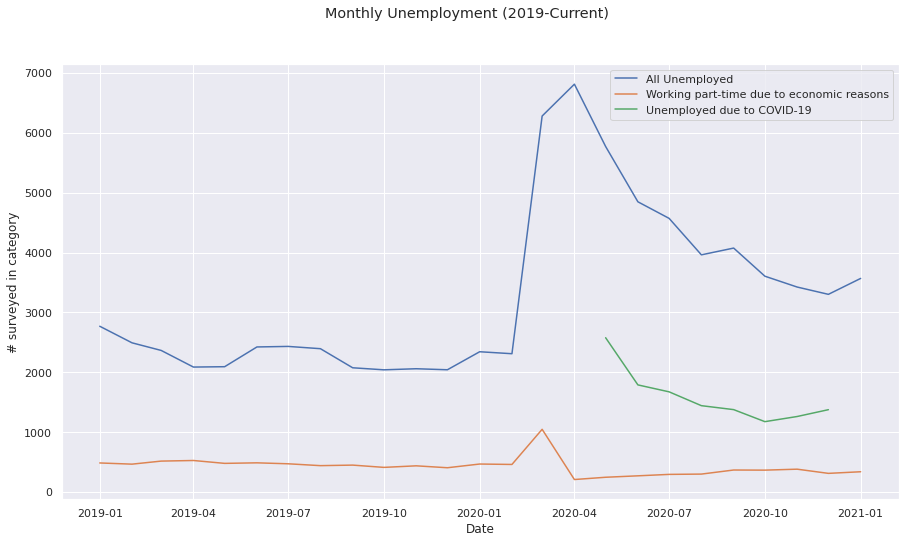

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(
    grouped_df,
)

ax.set_xlabel("Date")
ax.set_ylabel("# surveyed in category")

ax.legend([
        "All Unemployed",
        "Working part-time due to economic reasons",
        "Unemployed due to COVID-19",
    ])

fig.suptitle("Monthly Unemployment (2019-Current)")

plt.savefig("unemp.png")